# 4.9 Intro to Data Visualization with Python
Part 2

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Dataframes
path = r'C:\Users\cshat\06-2023 Instacart Basket Analysis'

In [3]:
df_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merged.pkl'))

Note: Due to memory issues with splitting the dataframe into big and small, the following steps were taken to change dtypes and decrease memory usage.

In [4]:
df_customers_merged = df_customers_merged.astype({"order_id": 'int32'})

In [5]:
df_customers_merged = df_customers_merged.astype({"user_id": 'int32'})

In [6]:
df_customers_merged = df_customers_merged.astype({"order_number": 'int8'})

In [7]:
df_customers_merged = df_customers_merged.astype({"orders_day_of_week": 'int8'})

In [8]:
df_customers_merged = df_customers_merged.astype({"order_hour_of_day": 'int8'})

In [9]:
df_customers_merged = df_customers_merged.astype({"days_since_last_order": 'float16'})

In [10]:
df_customers_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   order_id               int32  
 1   user_id                int32  
 2   order_number           int8   
 3   orders_day_of_week     int8   
 4   order_hour_of_day      int8   
 5   days_since_last_order  float16
 6   product_id             int64  
 7   add_to_cart_order      int64  
 8   reordered              int64  
 9   product_name           object 
 10  aisle_id               int64  
 11  department_id          int64  
 12  prices                 float64
 13  price_range_loc        object 
 14  busiest_day            object 
 15  busiest_days           object 
 16  busiest_period_of_day  object 
 17  max_order              int64  
 18  loyalty_flag           object 
 19  mean_price             float64
 20  spending_flag          object 
 21  median_days            float64
 22  frequency_flag  

In [12]:
# Export with new dtypes

df_customers_merged.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merged_2.pkl'))

In [13]:
df_customers_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [14]:
df_customers_merged.shape

(32404859, 32)

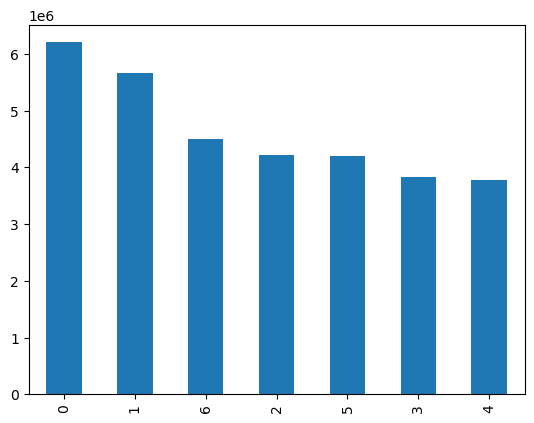

In [15]:
# Step 2
# Bar Charts
bar_1 = df_customers_merged['orders_day_of_week'].value_counts().plot.bar()

In [16]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_1_orders_dow.png'))

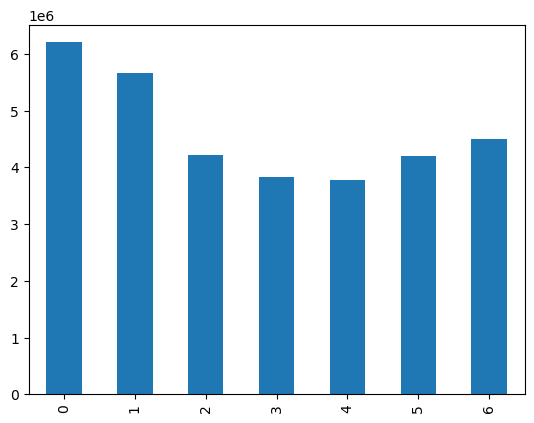

In [17]:
bar_2 = df_customers_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [18]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_2_orders_dow.png'))

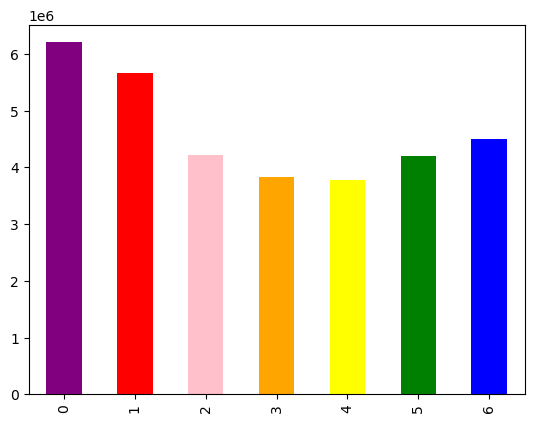

In [19]:
bar_3 = df_customers_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [20]:
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_3_orders_dow.png'))

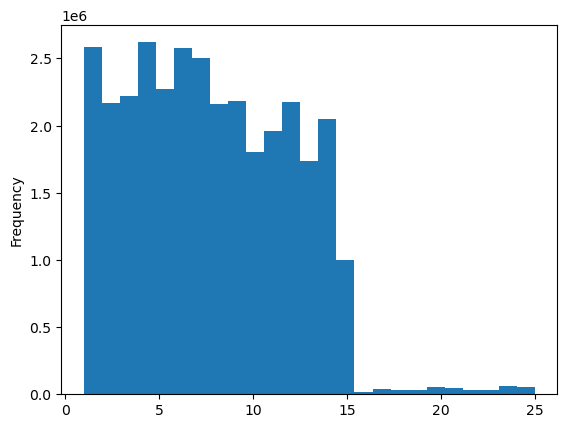

In [21]:
# Histograms
hist_1 = df_customers_merged['prices'].plot.hist(bins = 25)

In [22]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_1_prices.png'))

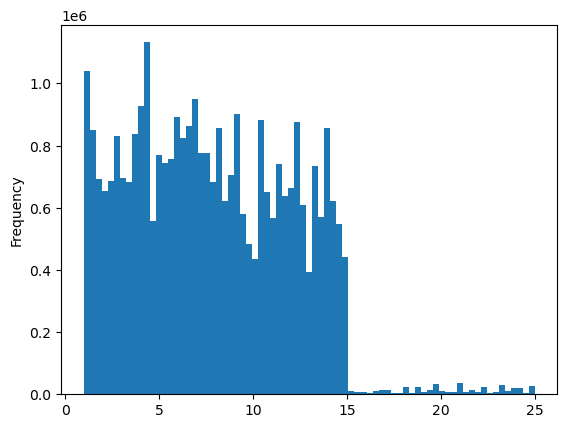

In [23]:
hist_2 = df_customers_merged['prices'].plot.hist(bins = 75)

In [24]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2_prices.png'))

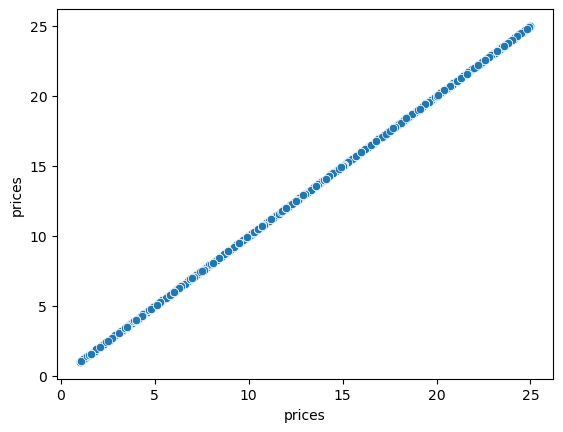

In [25]:
# Scatterplots
scatter_1 = sns.scatterplot(x = 'prices', y = 'prices',data = df_customers_merged)

The exercise includes the correction of some price values that are too high and likely typos. I had already done this in a previous task while cleaning the dataset. So those steps will be skipped here.

In [26]:
scatter_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_1_prices.png'))

In [27]:
# Line Chart
np.random.seed(4)

In [28]:
dev = np.random.rand(len(df_customers_merged)) <= 0.7

In [29]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [30]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [31]:
big = df_customers_merged[dev]

In [32]:
small = df_customers_merged[~dev]

In [33]:
len(df_customers_merged)

32404859

In [34]:
len(big) + len(small)

32404859

In [47]:
df_1 = small[['orders_day_of_week','prices']]

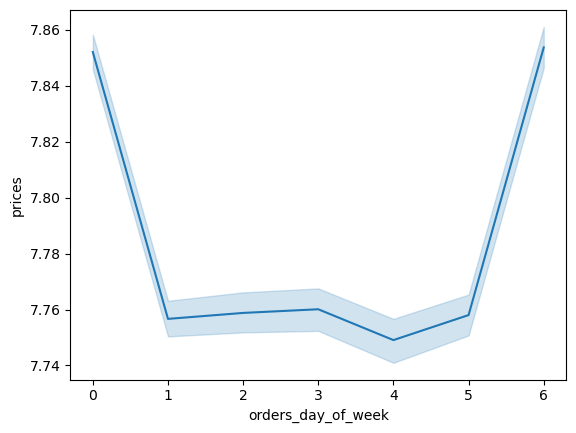

In [48]:
line_1 = sns.lineplot(data = df_1, x = 'orders_day_of_week', y = 'prices')

In [49]:
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_1_prices.png'))

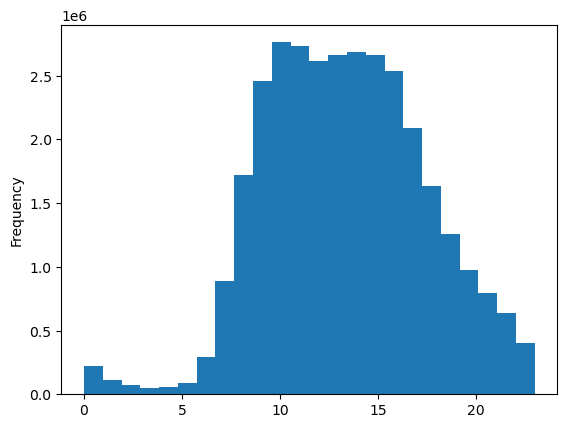

In [40]:
# Step 3
hist_3 = df_customers_merged['order_hour_of_day'].plot.hist(bins = 24)

In [41]:
hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_3_orders_hod.png'))

The histogram displays the frequency of shoppers throughout the day with the busiest period being between 9AM and 5PM.

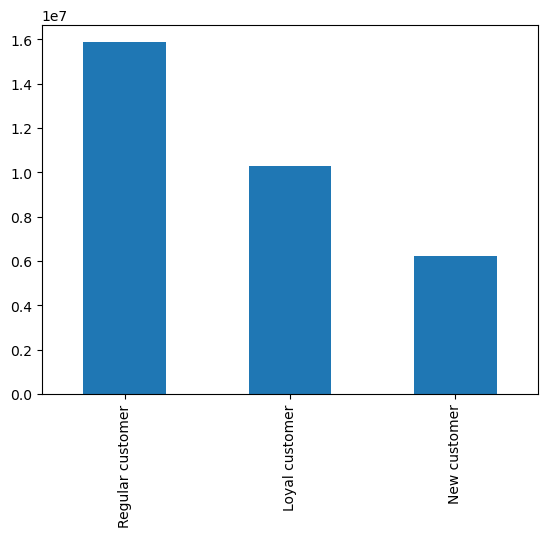

In [42]:
# Step 4
bar_4 = df_customers_merged['loyalty_flag'].value_counts().plot.bar()

In [43]:
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_4_loyalty.png'))

In [50]:
# Step 5
df_2 = small[['order_hour_of_day', 'prices']]

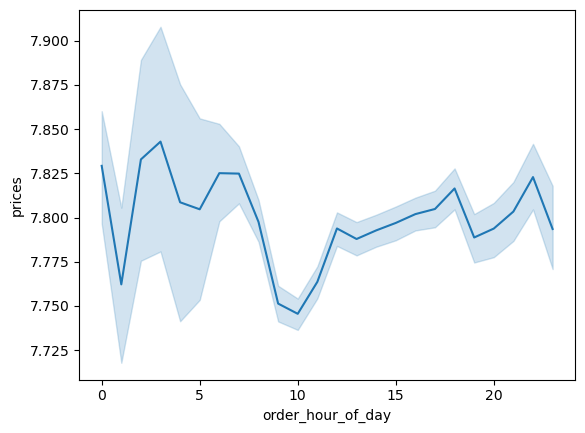

In [51]:
line_2 = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

In [52]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_2_orders_hod.png'))

In [53]:
# Step 6
df_3 = small[['age', 'dependants']]

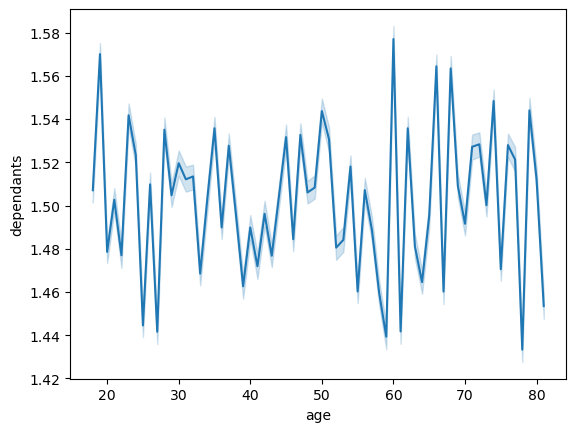

In [55]:
line_3 = sns.lineplot(data = df_3, x = 'age', y = 'dependants')

In [56]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_3_family.png'))

There doesn't seem to be an obvious correlation between age and number of dependants.

Note: After numerous memory errors and restarts, I finally reached the last step. A memory error occurred again and I decided this time not to start from the beginning. I will leave the previous part of the script untouched and pick up again here. The dataframe with revised dtypes will be imported.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Dataframes
path = r'C:\Users\cshat\06-2023 Instacart Basket Analysis'

In [3]:
df_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merged_2.pkl'))

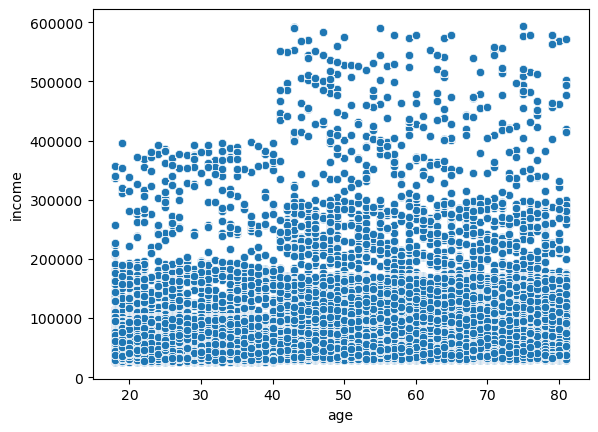

In [4]:
# Step 7
scatter_2 = sns.scatterplot(x = 'age', y = 'income',data = df_customers_merged)

In [5]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_2_income.png'))

For all ages, income under 200000 is most common. However, income over 200000 is more prevalent among the older customers.

All images were saved as they were generated throughout the script.